In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# =========================
# 1) Cargar el dataset
# =========================
df = pd.read_csv("../datasets/recruitment_data.csv")

In [3]:
# =========================
# 2) Resumen por columna
# =========================
total_filas = len(df)

resumen_cols = []
for col in df.columns:
    serie = df[col]
    faltantes = serie.isna().sum()
    porc_faltantes = (faltantes / total_filas) * 100 if total_filas > 0 else np.nan
    unicos = serie.nunique(dropna=True)
    minimo = serie.min(skipna=True)
    maximo = serie.max(skipna=True)

    resumen_cols.append({
        "columna": col,
        "valores_faltantes": int(faltantes),
        "porcentaje_faltantes": round(porc_faltantes, 2),
        "valores_unicos": int(unicos),
        "total_filas": int(total_filas),
        "minimo": minimo,
        "maximo": maximo
    })

resumen_df = pd.DataFrame(resumen_cols)
print("\n===== RESUMEN DE COLUMNAS =====")
print(resumen_df.to_string(index=False))


===== RESUMEN DE COLUMNAS =====
            columna  valores_faltantes  porcentaje_faltantes  valores_unicos  total_filas    minimo     maximo
                Age                  0                   0.0              31         1500 20.000000  50.000000
             Gender                  0                   0.0               2         1500  0.000000   1.000000
     EducationLevel                  0                   0.0               4         1500  1.000000   4.000000
    ExperienceYears                  0                   0.0              16         1500  0.000000  15.000000
  PreviousCompanies                  0                   0.0               5         1500  1.000000   5.000000
DistanceFromCompany                  0                   0.0            1500         1500  1.031376  50.992462
     InterviewScore                  0                   0.0             101         1500  0.000000 100.000000
         SkillScore                  0                   0.0             101   

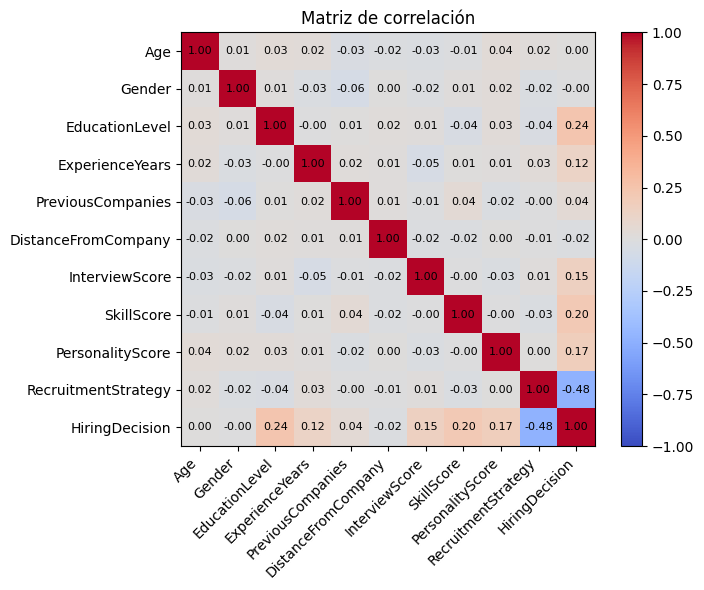

In [4]:
# =========================
# 3) Matriz de correlación
# =========================
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)

# Anotar valores dentro de cada celda
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        val = corr.iloc[i, j]
        plt.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=8, color="black")

plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

In [5]:
# =========================
# 4) Selección de características / target
# =========================
features = ["PersonalityScore", "SkillScore", "InterviewScore", "EducationLevel", "ExperienceYears", "RecruitmentStrategy"]
X = df[features]
y = df["HiringDecision"]

In [6]:
# =========================
# 5) Train/Test split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# =========================
# 6) Modelo Random Forest
# =========================
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

# Entrenar
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, random_state=42)

In [8]:
# =========================
# 7) Evaluación
# =========================
y_pred = model.predict(X_test)

print("\n===== MÉTRICAS DEL MODELO =====")
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


===== MÉTRICAS DEL MODELO =====
Accuracy: 94.0 %

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       215
           1       0.94      0.85      0.89        85

    accuracy                           0.94       300
   macro avg       0.94      0.91      0.92       300
weighted avg       0.94      0.94      0.94       300



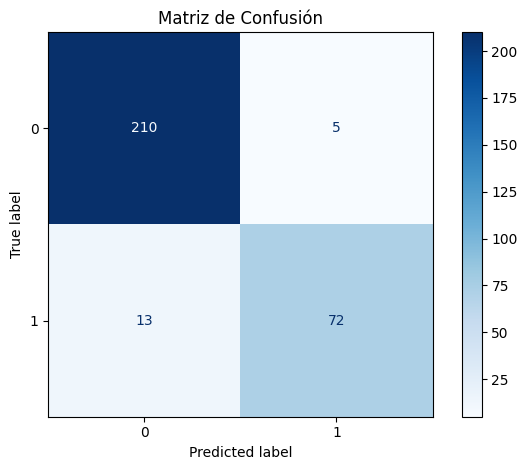

In [9]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

In [10]:
# =========================
# 8) Guardar modelo
# =========================
joblib.dump(model, "modelo_rf_contratacion.pkl")
print("\nModelo Random Forest guardado como 'modelo_rf_contratacion.pkl'")


Modelo Random Forest guardado como 'modelo_rf_contratacion.pkl'
